<a href="https://colab.research.google.com/github/Ajb2307/DSPS_ABaldelli/blob/main/HW2/Instructions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [6]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
...

Ellipsis

In [7]:
Norm_0 = stats.norm(0, 1)
Norm_10 = stats.norm(10, 1)
tStudent_0 = stats.t(2)
tStudent_10 = stats.t(2, loc =10)


In [8]:
def posterior(prior, likelihood):
  """
  This function takes a prior and likelihood model and plots the pdf of these models and the resulting normalized posterior
  The pdf of the prior is plotted as a balck dashed line
  The pdf of the likelihood is plotted as a solid balck line
  The normalized posterior is plotted as a solid red line
  """

  x_start = -5
  x_stop = 15
  num_values = 1000

  x = np.linspace(x_start, x_stop, num_values)
  normalized_prior = prior.pdf(x)
  normalized_likelihood = likelihood.pdf(x)
  this_posterior = normalized_prior * normalized_likelihood

  delta_x = (x_stop - x_start) / num_values # delta x for the puropose of doing a summation integration
  posterior_norm = sum(this_posterior) * delta_x # summation integration, this value will serve to normalize the posterior

  plt.plot(x, normalized_prior, "k--", label = "prior")
  plt.plot(x, normalized_likelihood, "k", label = "likelihood")
  plt.plot(x, this_posterior / posterior_norm, "r", label = "posterior")
  plt.legend()
  plt.ylim(0, 0.6)
  plt.xlabel("x") #all plots need axis labels!!
  plt.ylabel("Normalized Probability Density") #all plots need axis labels!!

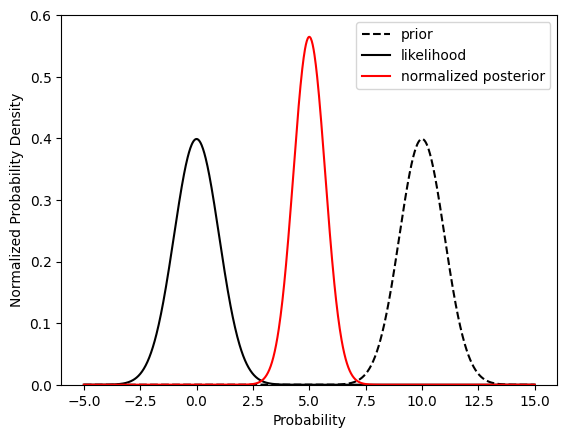

In [9]:
#function call
posterior(Norm_10, Norm_0)

**Fig 1:**  The prior in this figure is a normal distribution with a mean of 10 and variance of 1, and the likelihood is a normal distribution with a mean of 0 and a variance of 1. The posterior in this case has a mean around 5, which shows that in this case, the posterior results in an average between that of the prior and likelihood. The resulting posterior keeps a similar single modal shape as both the prior and posterior, but is shifted to between the prior and posterior’s distributions.

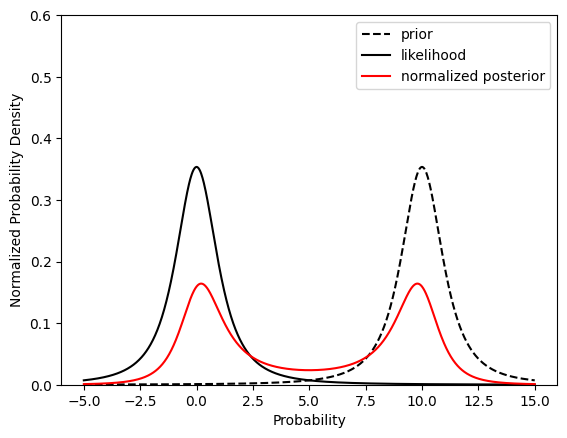

In [12]:
posterior(tStudent_10, tStudent_0)

**Fig 2:** The prior in this figure is a Student's-t distribution with 2 degrees of freedom and centered on 10, and the likelihood is a Student's-t distribution with 2 degrees of freedom and centered on 0. The posterior in this case is a bimodal distribution with peaks around 0 and 10, which is notably not a distribution that falls between the prior and likelihood as was the case in Figure 1. We can see when using the Student’s-t distributions, the information of both the prior and likelihood’s density distribution is not changed, but the shape of those distributions is.


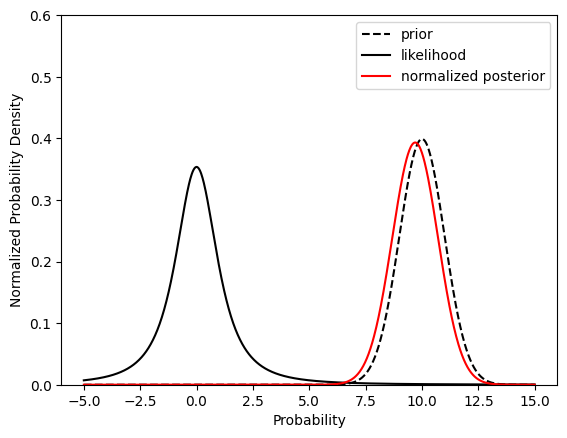

In [11]:
posterior(Norm_10, tStudent_0)

**Fig 3:** The prior in this function is a normal distribution with a mean of 10 and a variance of 1, and the likelihood is a Student's-t distribution with 2 degrees of freedom and centered on 0. The posterior in this case is a distribution with a mean less than 10 but greater than nine, showing that in this case the likelihood did not have as much of an effect on the posterior as in the cases shown by Figures 1 and 2. The resulting posterior reflects the prior more than the likelihood, which makes sense as the Student’s-t distribution (likelihood) has less density at the center than the normal distribution (prior), making its mean more strongly reflected in the posterior.

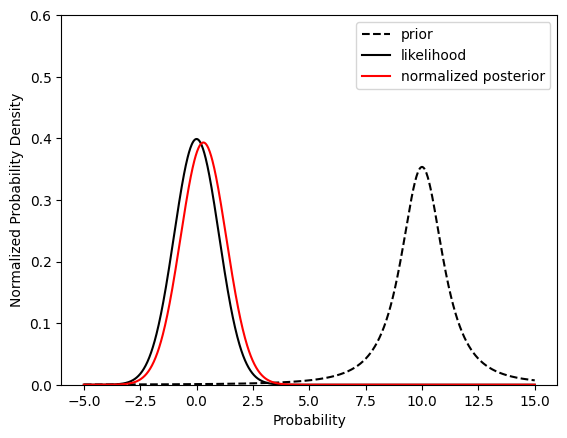

In [10]:
posterior(tStudent_10, Norm_0)

**Fig 4:** The prior in this function is a Student's-t distribution with 2 degrees of freedom and centered on 10, and the likelihood is a normal distribution with a mean of 0 and a variance of 1. The posterior in this case is a distribution with a mean greater than 0 but less than one. The resulting posterior better reflects the likelihood than the prior in contrast to Figure 3, but as in Figure 3, the normal distribution has a stronger effect on the resulting posterior than the Student-t distribution on the center and shape of the model.